In [575]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Definição do problema

**Criando os padrões de entrada**
Primeiro é gerado aleatoriamente uma matriz de valores (mxn) que representam as entradas da rede neural.

Posteriormente criamos o vetor d, que representa os valores de saída da função definida na Figura.

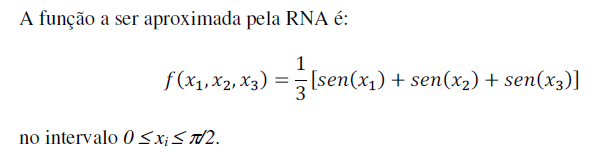

**ALterar número de Padrões aqui**

In [576]:
#criando padrões de entrada - 600 de inicio
x=np.random.rand(500,3)
x=(np.pi/2)*x
x

array([[0.64450875, 0.33435749, 1.44386588],
       [0.15400852, 0.9052076 , 1.00757651],
       [0.95922273, 0.7611314 , 1.29593264],
       ...,
       [0.17426429, 0.46600858, 1.19658591],
       [1.19027274, 0.0455132 , 0.36625503],
       [0.32339786, 0.50166826, 0.64610845]])

In [577]:
#confere o tamanho da matriz gerada
x.shape
#x[:,0].shape

(500, 3)

In [578]:
#criando nosso "target" valor desejado
d=1/3*(np.sin(x[:,0])+np.sin(x[:,1])+np.sin(x[:,2]))
d.shape

(500,)

In [579]:
#passando para dataframe, formato visual de tabelas
df1 = pd.DataFrame(d, columns=['saida'])
df1

,saida
0,0.640308
1,0.595165
2,0.823650
3,0.531444
4,0.258117
...,...
495,0.883065
496,0.726832
497,0.517835
498,0.444030


In [580]:
#passando para dataframe, formato visual de tabelas
df2=pd.DataFrame(x, columns = ['entrada 1', 'entrada 2', 'entrada 3'])
df2

,entrada 1,entrada 2,entrada 3
0,0.644509,0.334357,1.443866
1,0.154009,0.905208,1.007577
2,0.959223,0.761131,1.295933
3,0.753201,0.228345,0.753216
4,0.050018,0.234619,0.514249
...,...,...,...
495,1.141596,1.184163,0.950512
496,0.979494,0.524002,1.015856
497,0.174264,0.466009,1.196586
498,1.190273,0.045513,0.366255


In [581]:
#Dataframe com dados de entradas e saída
df=[df2,df1]
df = pd.concat(df, axis=1)
df

,entrada 1,entrada 2,entrada 3,saida
0,0.644509,0.334357,1.443866,0.640308
1,0.154009,0.905208,1.007577,0.595165
2,0.959223,0.761131,1.295933,0.823650
3,0.753201,0.228345,0.753216,0.531444
4,0.050018,0.234619,0.514249,0.258117
...,...,...,...,...
495,1.141596,1.184163,0.950512,0.883065
496,0.979494,0.524002,1.015856,0.726832
497,0.174264,0.466009,1.196586,0.517835
498,1.190273,0.045513,0.366255,0.444030


In [582]:
#definindo nossas entradas
features = ['entrada 1',	'entrada 2',	'entrada 3']

# Definição da variável-alvo/saída
target = ["saida"]

# Preparação dos argumentos para os métodos da biblioteca ``scikit-learn``, ou seja, separar em treino e teste
X = df[features]
y = df[target]

In [583]:
#separa em treino e teste o dataframe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.166, random_state=337)

In [584]:
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

Alterar Número de Neurônios da camada escondida aqui

In [585]:
# número de neurônios da camada escondida
nro_N_escond=10
# taxa de aprendizagem          
neta=0.1
#Tolerância erro	               
epsilon=1e-6
#  % número de iterações (número de epocas)
epocas=0
# % valor inicial da variavel eqm_ant              
eqm_ant=1     
# % valor atual da variavel eqm_ant                
eqm_atual=0
#numero de entradas da rede
nro_entr = X_train.shape[1]
#numero de padrões de treino
nro_padr=X_train.shape[0]

In [586]:
# % vetor de pesos iniciais para a camada de saida!
w2=np.random.rand(nro_N_escond,1)
# % matriz de pesos iniciais para a camada escondida!        
w1=np.random.rand(nro_N_escond,nro_entr)
# % pesos iniciais para a camada de saida! 
w02=np.random.rand()
# % matriz de pesos iniciais !                     
w01=np.random.rand(nro_N_escond,1)
dw01=np.random.rand(nro_N_escond,1)

# Rede neural -  Treinamento
A rede neural criada tem como base a Figura abaixo.

Os critérios de paradas definidos dependem do número de épocas ou erro quadrado médio.

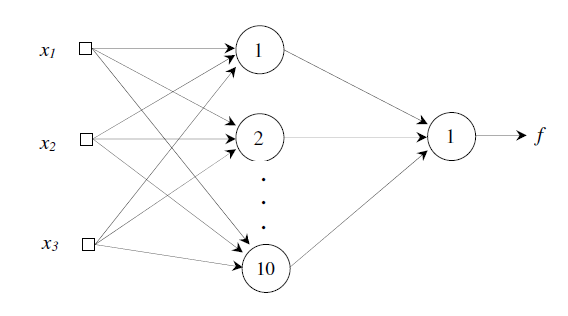

In [587]:
#definindo a função de ativação
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
#  inicio estrutura de repetição condicional
y1 = np.zeros((nro_N_escond,1))
epocas = 0
vet_x=[]		            # vetor que armazena os números das epocas
vet_y=[]                # vetor que armazena EQM

while (abs(eqm_atual-eqm_ant)>epsilon) and (epocas<2000):
  epocas+=1 # incrementa a variável "epocas" a cada iteração  
  if epocas%50 ==0:
    print('epoca número ',epocas)
  else:	
    pass			            
  eqm_ant=eqm_atual;
  # bias saida
  dw2=0;                           
  #  vetor de ajuste dos pesos da camada escondida                                       
  dw1=np.zeros((nro_N_escond,nro_entr))
  #  vetor gradiente local da camada escondida         
  grad_N_escond=np.zeros((nro_N_escond,1))
  #  início da soma dos eq 
  soma_eq=0;                                
  for n in range(nro_padr):    #  início estrutura de repetição para apresentar os padrões de uma época  
    for j in range(nro_N_escond):
      x=np.dot(w1[j,:], X_train[n,:])-w01[j]   
 #início estrutura de repetição para calcular a saida dos neurônios da camad escondida
      y1[j]=sigmoid(x)   #  cálculo da saida j-ésimo neurônio da camada escondida      
        #% fim repetição para calcular a saida dos neurônios da camad escondida
        #y1 contem 10 valores relacionados com os 10 neurônios da entrada para escondida
    y2=sigmoid(np.dot(w2.T,y1)-w02)   #  cálculo da saida final da rede    
    erro=y_train[n]-y2                # cálculo do erro (d-y2)      
    grad_saida=erro*y2*(1-y2)            # cálculo do gradiente local
    dw2=neta*grad_saida*y1          #  ajuste dos pesos do neurônio da camada de saida 
    dw02=neta*grad_saida*(-1)
    w2 += dw2                            # ajuste dos pesos da camada de saida
    w02 += dw02
    soma_eq=soma_eq+0.5*erro**2          #% cálculo do erro quadrático
    
    for j in range(nro_N_escond):                  # início do ajuste dos pesos camada escondida
        grad_N_escond[j]=y1[j]*(1-y1[j])*grad_saida*w2[j]   #  cálculo do gradiente local do j-ésimo neurônio da camada escondida 
        dw1[j,:]=neta*grad_N_escond[j]*X_train[n,:]    # correção dos pesos do j-ésimo neurônio da camada escondi     
        dw01[j]=neta*grad_N_escond[j]*(-1)
                                  #% fim darepetição para calcular o ajuste dos pesos camada escondida                       
    w1=w1+dw1                            # ajuste de pesos da camada escondida
    w01=w01+dw01
                                        #% fim da época

  eqm=soma_eq/nro_padr;	                #% calculo do erro quadrático médio em relação à epoca
  # print(eqm)
  eqm_atual=eqm;                        
  # print(eqm)
  dif_eqm = eqm_ant-eqm_atual           #% apresenta a diferenças dos eqm das épocas mais recentes

  vet_x.append(epocas)		            #% vetor que armazena os números das epocas
  vet_y.append(eqm)                  # % vetor que armazena o respectivo valor do erro quadrático
print("Número de épocas finais", epocas)                                #% fim da estrutura de repetição condicional 


epoca número  50
Número de épocas finais 68


In [ ]:
resultados_teste=np.zeros(len(X_test))
for n in range(len(X_test)):       # início estrutura de repetição para apresentar os padrões de uma época  
    for j in range(nro_N_escond):
      x=np.dot(w1[j,:], X_test[n,:])-w01[j]   # início estrutura de repetição para calcular a saida dos neurônios da camad escondida                   
      y1[j]=sigmoid(x)   # % cálculo da saida j-ésimo neurônio da camada escondida 
     
        # fim estrutura de repetição para calcular a saida dos neurônios da camad escondida
        #y1 contem 10 valores relacionados com os 10 neurônios da entrada para escondida
    y2=sigmoid(np.dot(w2.T,y1)-w02) 
    resultados_teste[n]=y2

# Avaliação e gráficos - Teste com 10 neurônios na Camada Escondida

In [ ]:
erro_teste = (resultados_teste-y_test.T)
MAPE = np.mean(abs(erro_teste/y_test))*100
print("Mean Absolute Percentage Error",MAPE)
MAD = np.std(abs(erro_teste))
print("Mean Absolute Deviation",MAD)

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 10), )
fig.suptitle('Gráficos')
plt.figure(figsize=(10,10))
vet_y = np.array(vet_y).reshape(-1,)
axs[0].plot(vet_y, label="EQM")
axs[0].legend(loc="upper right")
axs[0].grid(True)
# set_title('EQM x ÉPOCAS')
axs[1].plot(resultados_teste, 'b')
axs[1].plot(y_test, 'r', label = ['RNA (azul)','TESTE:  (verm.)' ])
axs[1].legend([ 'RNA (azul)','VALORES REAIS'], loc="upper right")
axs[1].grid(True)
axs[2].plot(np.array(erro_teste).reshape(-1,),label='VALIDAÇÃO: ERRO x PADRÃO')
axs[2].legend(loc="upper right")
axs[2].grid(True)
plt.show()

# Comparação dos Resultados
10 Neurônios:


1.   Mean Absolute Percentage Error 5.95
2.   Mean Absolute Deviation 0.025
3.   57 Épocas

5 Neurônios:


1.   Mean Absolute Percentage Error 5.27
2.   Mean Absolute Deviation 0.02
3.   66 Épocas

15 Neurônios:


1.   Mean Absolute Percentage Error 5.23
2.   Mean Absolute Deviation 0.019
3.   59 Épocas

30 Neurônios:


1.   Mean Absolute Percentage Error 5.50
2.   Mean Absolute Deviation 0.022
3.   59 Épocas

70 Neurônios:


1.   Mean Absolute Percentage Error 61.3
2.   Mean Absolute Deviation 0.18
3.   2 Épocas


Com muitos 70 neurônios a rede não aprendeu nada, possivelmente houve uma situação de overfitting


**Resultados com 10 Neurônios e aumentando o número de padrões**


700 Padrões:


1.   Mean Absolute Percentage Error 5.014
2.   Mean Absolute Deviation 0.021
3.   61 Épocas

800 Padrões:


1.   Mean Absolute Percentage Error 5.49
2.   Mean Absolute Deviation 0.021
3.   42 Épocas


900 Padrões:


1.   Mean Absolute Percentage Error 5.22
2.   Mean Absolute Deviation 0.019
3.   54 Épocas

3000 Padrões:


1.   Mean Absolute Percentage Error 1.94
2.   Mean Absolute Deviation 0.010
3.   166 Épocas


**Conclusões**

Se houver um aumento significativo de neurônios, em certo ponto a rede deixa de aprender, como podemos observar, com 70 neurônios a rede não aprendeu nada, assim, nem sempre quanto maior o número de neurônios melhor será o resultado, o mais provavel nesse caso é que ocorra overfitting.

Com o incremento do número de padrões, a tendência é que a rede aprenda de maneira significativa conforme aumenta o número de padrões de treinamento.
Com 3000 exemplos (17% separados para teste), houve uma melhora significativa no aprendizado da rede, chegando à um valor MPE de 1.94%, que inicialmente era de aproximadamente 6%.

